영상당 피쳐의 갯수를 DCGAN의 경우와 같게해서 실험.
일단은 그것이라도 결과가 좋게 나온다면.
논문을 써볼수 있다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [2]:
# real correspondence list  (dist: 0 ~ 0.5)
real_corr_list= [[352, 1400], [353, 1401], [390, 1448], [391, 1449], [394, 1452], [395, 1453], [400, 1460], [540, 1618], [543, 1619], [544, 1620], [749, 1819], [940, 2018], [941, 2019], [942, 2020], [943, 2021], [944, 2022], [945, 2023], [946, 2024], [957, 2035], [959, 2037], [960, 2038], [961, 2039], [962, 2040], [963, 2041], [986, 2064], [987, 2065], [988, 2066], [989, 2067], [990, 2068], [991, 2069], [992, 2070], [993, 2071], [994, 2072], [995, 2073], [996, 2074], [1004, 2082], [1148, 2222], [1225, 2303], [1226, 2304], [1231, 2311], [1275, 2355], [1287, 2365], [1289, 2367], [1290, 2368], [1302, 2378], [1303, 2381]]

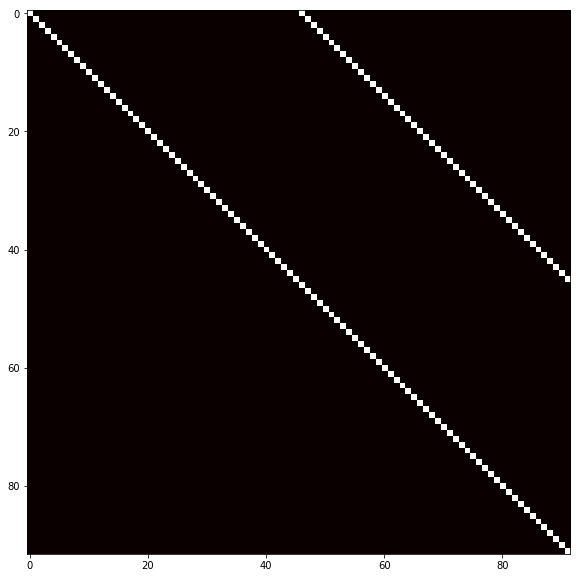

In [3]:
image_idx_order = []
with open("/home/dongwonshin/Desktop/DBoW2/build/DCGAN_image_order.txt") as fp:
    for l in fp:
        idx = l.split('.')[0].split('/')[-1]
        image_idx_order.append(int(idx))

GT_corr_mat = np.zeros((len(image_idx_order),len(image_idx_order)))

for a, i in enumerate(image_idx_order):
    for b, j in enumerate(image_idx_order):
        if i==j:
            GT_corr_mat[a,b] = 1
        if [i,j] in real_corr_list:
            GT_corr_mat[a,b] = 1


plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

In [4]:
def PrecisionRecalCurve(GT_corr_mat, esti_corr_mat):

    precision, recall, _ = precision_recall_curve(GT_corr_mat.flatten(), esti_corr_mat.flatten())
    average_precision = average_precision_score(GT_corr_mat.flatten(), esti_corr_mat.flatten())

    # Plot Precision-Recall curve
    plt.clf()
    plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
    plt.legend(loc="lower left")
    plt.show()

# Proposed method

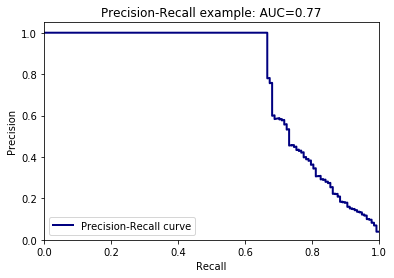

In [35]:
# L1_NORM
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

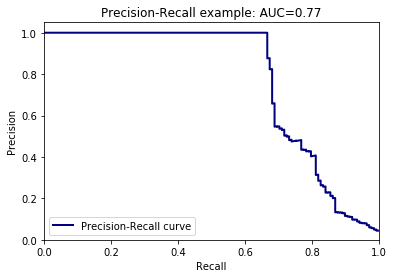

In [7]:
# L2_NORM
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

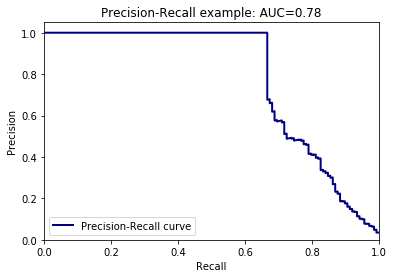

In [10]:
# BHATTACHARYYA
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

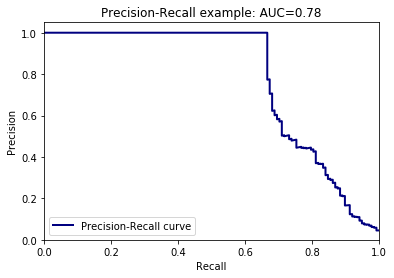

In [9]:
# CHI_SQUARE
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

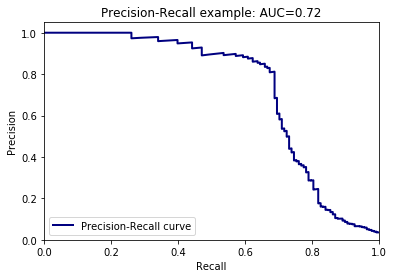

In [11]:
# DOT_PRODUCT
prop_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/DCGAN_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, prop_esti_corr_mat)

# SURF

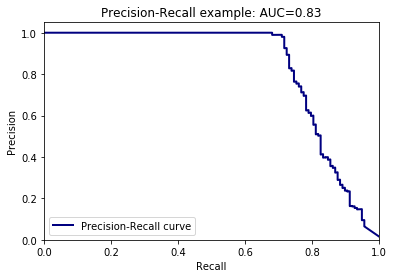

In [42]:
# SURF
surf_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBoW2/build/SURF_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, surf_esti_corr_mat)

# ORB

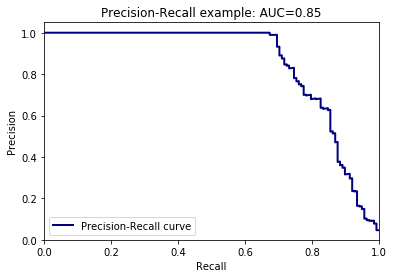

In [43]:
# ORB
orb_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBow3/build/orb_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, orb_esti_corr_mat)

# BRISK

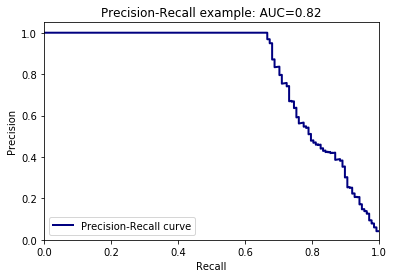

In [44]:
# BRISK
brisk_esti_corr_mat = np.loadtxt('/home/dongwonshin/Desktop/DBow3/build/brisk_corr_matrix.txt')
PrecisionRecalCurve(GT_corr_mat, brisk_esti_corr_mat)